# Workshop 2.1 : On hand web parsing
Crawl data from https://comprogchula.github.io/

<img src ="https://github.com/Mixelon-tera/Workshop2_Datascraping_Resource/raw/master/source/intro_scraping.png" width="800">

In [2]:
import urllib
import urllib.request as urq
import os

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(dir_path)

C:\Users\Nirawit EN\OneDrive\เดสก์ท็อป\CPCU\Workshop2-HTML


### Tip!

#### สำหรับเรื่อง string ในภาษา python ต้องระวังเรื่อง escape character เรามักจะใช้เครื่องหมาย \ นำหน้า escape character ดังนี้

<img src="https://i2.wp.com/www.techpaste.com/wp-content/uploads/2014/06/Escape_Characters_Python.jpg?fit=441%2C425&ssl=1" width=400>

# TO DO 1 : Crawl "Faculty Name" [only 19 faculties] (1%)

List all the faculty names from Chulalongkorn University and display the total number of faculties, as shown below

# **Expected Result**
```
Faculty of Allied Health Sciences
Faculty of Architecture
Faculty of Arts
Faculty of Commerce and Accountancy
Faculty of Communication Arts
Faculty of Dentistry
Faculty of Economics
Faculty of Education
Faculty of Engineering
Faculty of Fine and Applied Arts
Faculty of Law
Faculty of Medicine
Faculty of Nursing
Faculty of Pharmaceutical Sciences
Faculty of Political Science
Faculty of Psychology
Faculty of Science
Faculty of Sports Science
Faculty of Veterinary Science

Number of Faculties : 19
```

In [3]:
url = 'https://comprogchula.github.io/'
html = str(urq.urlopen(url).read().decode('utf-8'))
# ---- TO DO 1 : Code Here ----
endpart = html.find("Academic Programs")
index = 0
counter = 0
done = False
while not done:
  index = html.find('Faculty of', index+1)
  if index < endpart:
    x = html[index:html.find('<', index)]
    print(x)
    counter += 1
  else:
    done = True
print(f'\nNumber of Faculties : {counter}')

Faculty of Allied Health Sciences
Faculty of Architecture
Faculty of Arts
Faculty of Commerce and Accountancy
Faculty of Communication Arts
Faculty of Dentistry
Faculty of Economics
Faculty of Education
Faculty of Engineering
Faculty of Fine and Applied Arts
Faculty of Law
Faculty of Medicine
Faculty of Nursing
Faculty of Pharmaceutical Sciences
Faculty of Political Science
Faculty of Psychology
Faculty of Science
Faculty of Sports Science
Faculty of Veterinary Science

Number of Faculties : 19


# TO DO 2 : Crawl "Faculty and Schools Image" [21 faculties and schools] (1%)

Print image's url and save image into folder 'faculty_image'

#### Hint : save images into -> dir_path+"/faculty_image"+faculty_name

# **Expected Result**
```
https://comprogchula.github.io/image/chula-faculty-allied-health-sciences-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/architecture-hero-1440x900-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-arts-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-commerce-and-accountancy-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-communication-arts-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-dentistry-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-economics-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-education-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-engineering-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/faculty-of-fine-and-applied-arts-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-law-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-medicine-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-nursing-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-pharmaceutical-sciences-hero-desktop-01-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-political-science-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-psychology-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-science-hero-desktop-2-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-sports-science-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-veterinary-science-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/school-of-integrated-building-1024x640.jpg
https://comprogchula.github.io/image/school-of-agricultural-hero-desktop-1024x640.jpg
https://comprogchula.github.io/image/chula-faculty-graduate-school-hero-desktop-1024x640.jpg
Total images: 22
```

<img src="https://github.com/Mixelon-tera/Workshop2_Datascraping_Resource/raw/master/source/save_fac_img.png" width=300>

In [4]:
#สร้าง folder ชื่อ faculty_image
! mkdir faculty_image

A subdirectory or file faculty_image already exists.


### ขั้นตอนการอ่านและบันทึกไฟล์ภาพ

1. อ่านภาพจากลิงค์
* d = url.urlopen( [ลิงค์ของภาพ] )
---
2. สร้างไฟล์พร้อมระบุตำแหน่งที่จะเก็บไฟล์ภาพ
* l = open( [ระบุตำแหน่งที่จะเก็บภาพ] )
---

3. บันทึกข้อมูลภาพไปยังตำแหน่งที่เก็บไฟล์ตามที่ระบุไว้ในข้อ (2.)
* l.write(d.read())
---

4. ปิดไฟล์
* l.close()
---


In [5]:
# ---- TO DO 2 : Code Here ----
# ---- TO DO 2 : Code Here ----
endpart = html.find("Academic Programs")
index = 0
done = False
key = 'data-src=\"'
L = []
while not done:
  index = html.find(key, index+1)
  if index < endpart:
    x = html[index+10:html.find('\"', index+10)]
    L.append(x)
  else:
    done = True

k = 'https://comprogchula.github.io/image/'
import urllib.request

for l in L:
    try:
        x = (l[len(k):len(l)]).replace("chula-", "")
        d = urllib.request.urlopen(l)
        f = open(r"C:\Users\Nirawit EN\OneDrive\เดสก์ท็อป\CPCU\Workshop2-HTML\faculty_image" + x , 'wb')
        f.write(d.read())
        f.close()
    except Exception as e:
        print(f"Error saving {l}: {e}")


# TO DO 3 : Crawl "Faculty Telephone Number" [19 Faculties] (1%)

Print Tel. of each faculty in Chulalongkorn University

<font color="red">*** Only Faculty ***</font>

# **Expected Result**
```
faculty-of-allied-health-sciences-chulalongkorn-university
	0 2218 1065
faculty-of-architecture-chulalongkorn-university
	0 2218 4302
faculty-of-arts-chulalongkorn-university
	0 2218 4870
faculty-of-commerce-and-accountancy-chulalongkorn-university
	0 2218 5758
faculty-of-communication-arts-chulalongkorn-university
	0 2218 2215 ext. 0
faculty-of-dentistry-chulalongkorn-university
	0 2218 8635, 0 2218 8653, 0 2218 9016
faculty-of-economics-chulalongkorn-university
	0 2218 6259
faculty-of-education-chulalongkorn-university
	0 2218 2565 ext. 6760
faculty-of-engineering-chulalongkorn-university
	0 2218 6337
faculty-of-fine-and-applied-arts-chulalongkorn-university
	0 2218 4583
faculty-of-law-chulalongkorn-university
	0 2218 2017
faculty-of-medicine-chulalongkorn-university
	0 2256 4288, 0 2256 4000 ext. 3404
faculty-of-nursing-chulalongkorn-university
	0 2218 1131
faculty-of-pharmaceutical-sciences-chulalongkorn-university
	0 2215 0871 – 7 (Secretary office)
faculty-of-political-science-chulalongkorn-university
	0 2218 7250 – 3
faculty-of-psychology-chulalongkorn-university
	0 2218 1189
faculty-of-science-chulalongkorn-university
	0 2218 5000
faculty-of-sports-science-chulalongkorn-university
	0 2218 1032
faculty-of-veterinary-science-chulalongkorn-university
	0 2218 9771 – 3
Number of faculty: 19
```

In [6]:
# ---- TO DO 3 : Code Here ----






















# TO DO 4 : Current, Retired and Former Department Members (1%)

Faculty Members

from https://www.cp.eng.chula.ac.th/en/about/faculty/

## <font color="red">**Only include members with profile picture.**</font>
Some faculty members are no longer active. Therefore, we will exclude any member without a profile picture as shown below.



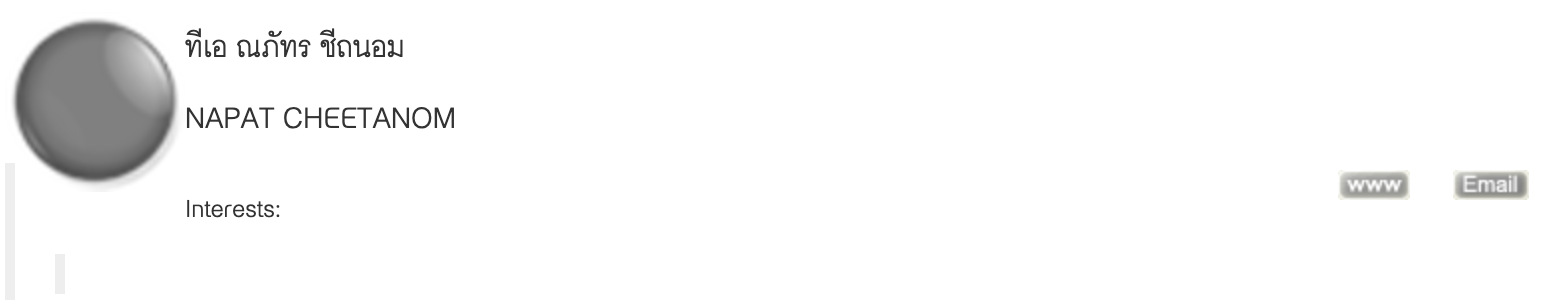

# **Expected Result**
```
Current Faculty Members

PROF.DR. BOONSERM KIJSIRIKUL
PROF. DR. PRABHAS CHONGSTITVATANA
ASSOC.PROF.DR. ATHASIT SURARERKS
ASSOC.PROF.DR. ATIWONG SUCHATO
ASSOC.PROF.DR. CHOTIRAT RATANAMAHATANA
ASSOC.PROF.DR. DUANGDAO  WICHADAKUL
ASSOC.PROF.DR. KRERK PIROMSOPA
ASSOC.PROF.DR. KULTIDA ROJVIBOONCHAI
ASSOC.PROF.DR. NUTTAPONG CHENTANEZ
ASSOC.PROF.DR. PEERAPON VATEEKUL
ASSOC.PROF.DR. PROADPRAN PUNYABUKKANA
ASSOC.PROF.DR. SETHA PAN-NGUM
ASSOC.PROF.DR. TARATIP SUWANNASART
ASSOC.PROF.DR. THANARAT CHALIDABHONGSE
ASSOC.PROF.DR. TWITTIE SENIVONGSE
ASSOC.PROF.DR. VEERA MUANGSIN
ASSOC.PROF.DR. VISHNU KOTRAJARAS
ASSOC.PROF.DR. WIWAT VATANAWOOD
ASSOC.PROF.DR. YACHAI LIMPIYAKORN
ASSOC.PROF. NAKORNTHIP PROMPOON
ASST.PROF.DR. ARTHIT THONGTAK
ASST.PROF.DR. ATTAWITH SUDSANG
ASST.PROF.DR. KUNWADEE  SRIPANIDKULCHAI
ASST.PROF.DR. NATAWUT NUPAIROJ
ASST.PROF.DR. NATTEE NIPARNAN
ASST.PROF.DR. NUENGWONG TUAYCHAROEN
ASST.PROF.DR. PITTIPOL  KANTAVAT
ASST.PROF.DR. PIZZANU KANONGCHAIYOS
ASST.PROF.DR. SUKREE SINTHUPINYO
ASST. PROF. CHATE PATANOTHAI
DR. EKAPOL  CHUANGSUWANICH
DR. JESSADA THUTKAWKORAPIN
Dr. Kamonluk Suksen
DR. MACHIGAR ONGTANG
Dr. NARONGDECH KEERATIPRANON
DR. PITCHAYA  SITTHI-AMORN
DR. PUNNARAI  SIRICHAROEN
Dr. Warisa  Sritriratanarak
THONGCHAI ROJAKANGSADAN

Retired Faculty Members

ASSOC. PROF. DR. PORNSIRI MUENCHAISRI
Assc.Prof. Dr. SARTID VONGPRADHIP
ASSOC. PROF. DR. SOMCHAI PRASITJUTRAKUL
Assc.Prof. Dr. WANCHAI RIVEPIBOON
Assc.Prof. MANDHANA PRAKANSAMUT
Asst.Prof. Dr. SUEBSKUL PHIPHOBMONGKOL
Asst.Prof. BOONCHAI SOWANWANICHAKUL
Asst.Prof. Korbkul Tejavanija
Asst.Prof. THANAWAN CHANTARATANAPIBUL
Dr. YUNYONG TENG-AMNUAY

Former Faculty Members

Assc.Prof. NONGLUK COVAVISARUCH
Dr. CHAIRAT PHONGPHANPHANEE
Dr. THIT SIRIBOON
```

In [7]:
# ---- TO DO 4 : Code Here ----






















# Optional

ทดลองดึงข้อมูลจาก dek-d.com ดูสิ :)

In [8]:
dd_url = 'https://www.dek-d.com/home/writer/'

ลองรันโค๊ดบรรทัดด้านล่างดู

In [9]:
html = str(urq.urlopen(dd_url).read().decode('utf-8'))

HTTPError: HTTP Error 403: Forbidden

จะพบว่าเกิด error ขึ้นเนื่องจากเว็บ dek-d มีการป้องกันไว้

หากเราต้อง scrape จะต้องส่ง user-agent เช่น Web-browser, Accept-Charset, Accept-Encoding เป็นต้น เพื่อหลอกเว็บไซต์ว่าเรากำลังใช้เว็บในการ request ข้อมูลเพจ

In [ ]:
headers={'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'}
dd_request = urq.Request(dd_url,None,headers)
dd_html = str(urq.urlopen(dd_request).read().decode('utf-8'))

ลองดึงข้อมูล title นิยายติดท็อปจากเว็บ https://www.dek-d.com/home/writer/ ดูสิ!!!

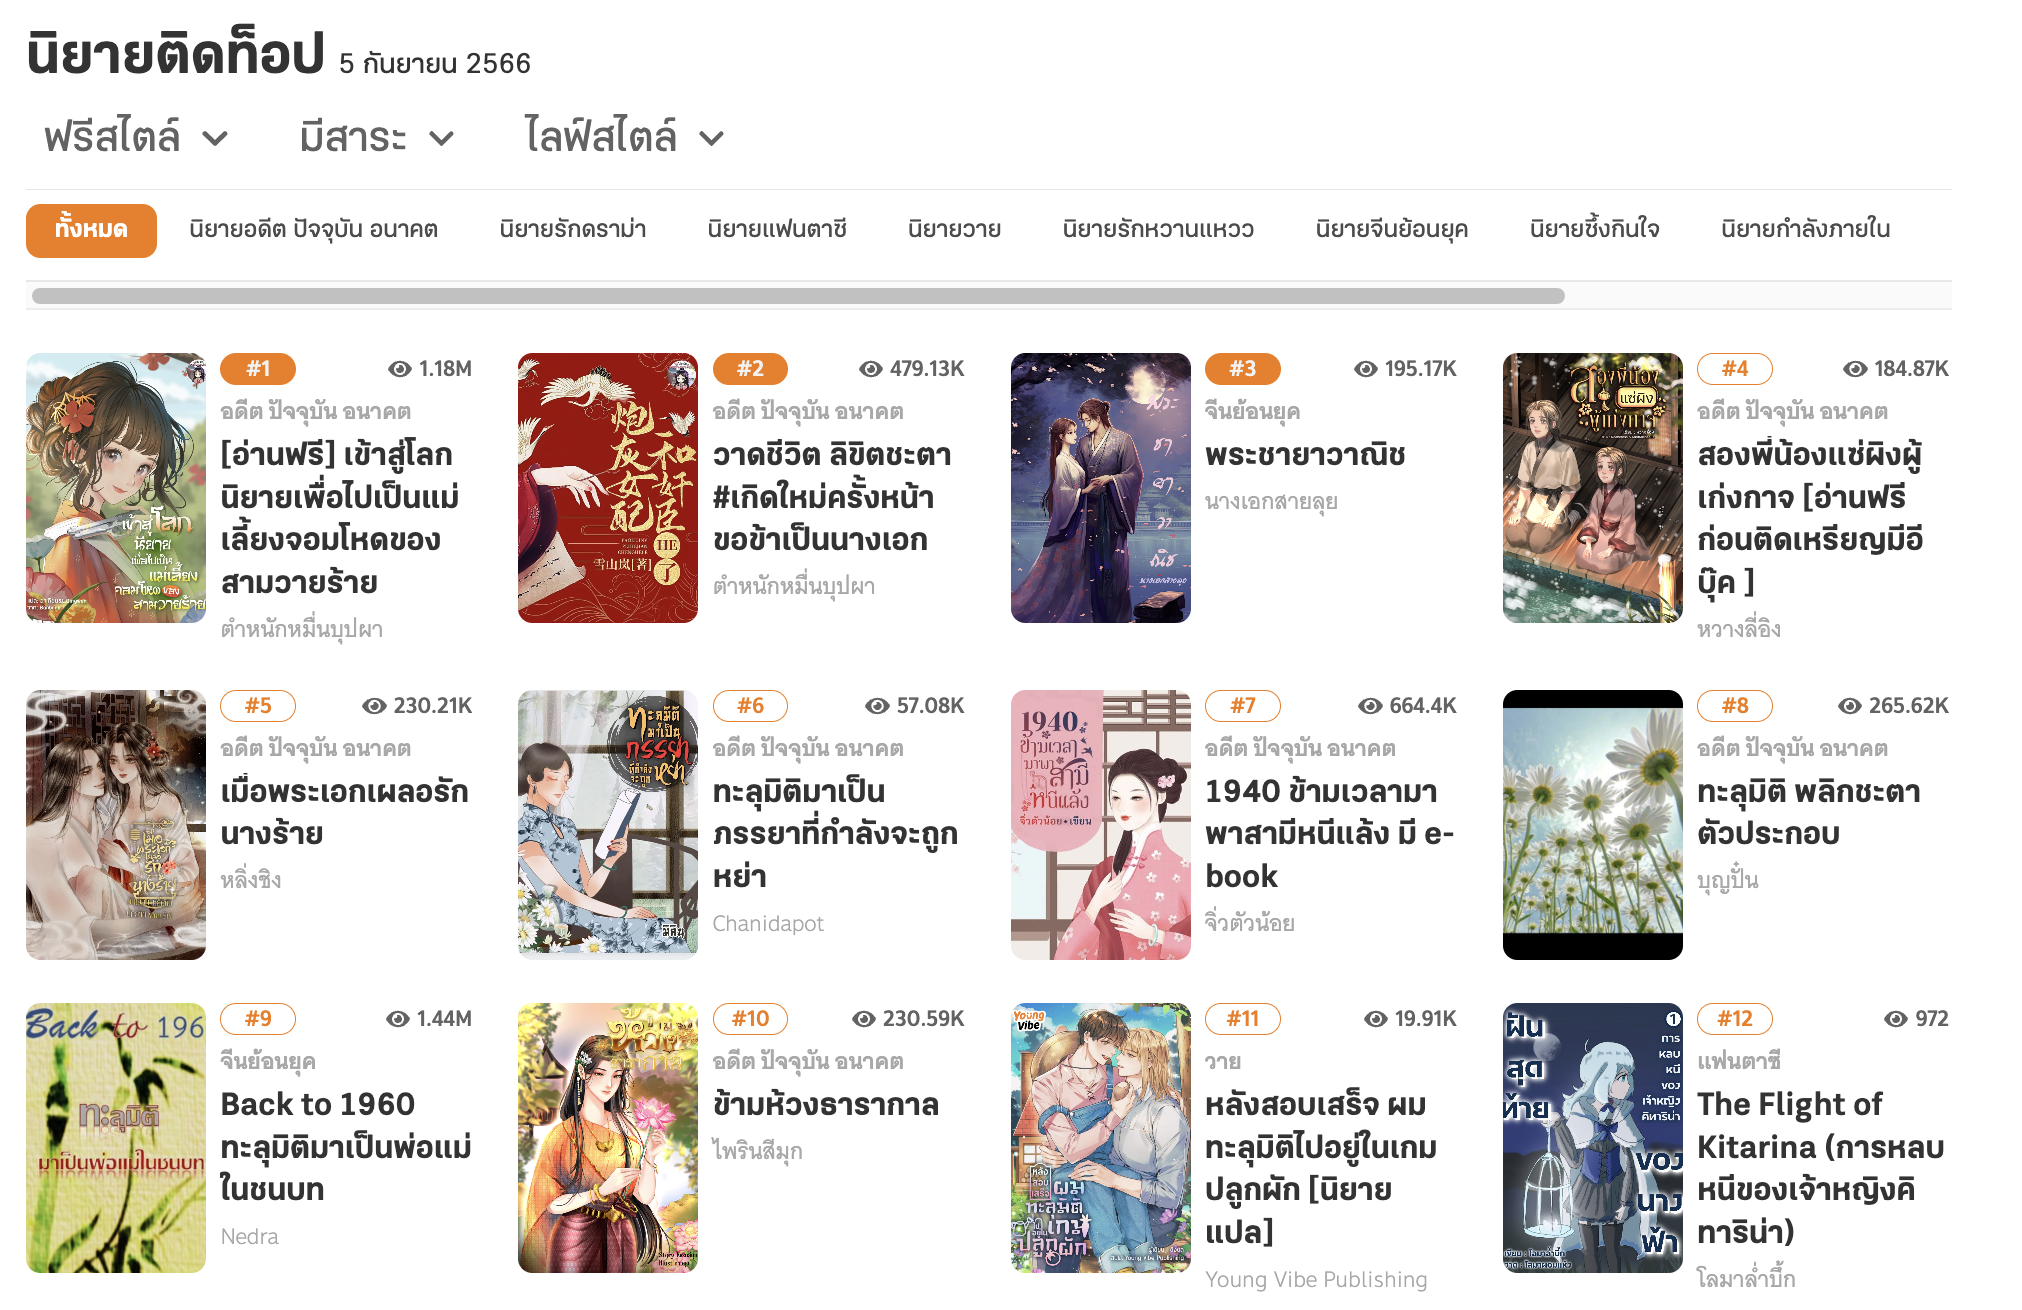

In [ ]:
# ---- OPTIONAL : Code Here ----





